In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, model_from_json
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import os


In [34]:
param_dir = "training_model_param/"
# param_name = "w2_m2_"
param_name = "w1_w7_"
# param_name = "m1e_w1_"
pram_filename = param_dir + param_name + 'param.hdf5'
model_filename = param_dir + param_name + 'model.json'

model = model_from_json(open(model_filename).read())
model.load_weights(pram_filename)

model.summary();

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25344)             0

In [35]:
batch_size = 128
IMG_HEIGHT = 180
IMG_WIDTH = 150

PATH = "training_data"
train_dir = os.path.join(PATH, 'train')

train_image_generator = ImageDataGenerator(rescale=1./255,validation_split=0.95) # Generator for 
train_data_gen = train_image_generator.flow_from_directory(
 batch_size=batch_size,
 directory=train_dir,
 shuffle=True,
 subset = "training",
 target_size=(IMG_HEIGHT, IMG_WIDTH),
 class_mode='binary')

print(train_data_gen[0])

Found 348 images belonging to 2 classes.
(array([[[[0.7, 0.7, 0.8],
         [0.8, 0.8, 0.8],
         [0.7, 0.7, 0.7],
         ...,
         [0.6, 0.6, 0.6],
         [0.7, 0.7, 0.7],
         [0.7, 0.7, 0.7]],

        [[0.7, 0.7, 0.7],
         [0.8, 0.7, 0.8],
         [0.8, 0.8, 0.8],
         ...,
         [0.7, 0.7, 0.7],
         [0.7, 0.8, 0.8],
         [0.7, 0.7, 0.7]],

        [[0.7, 0.7, 0.7],
         [0.7, 0.7, 0.7],
         [0.7, 0.7, 0.7],
         ...,
         [0.7, 0.7, 0.7],
         [0.7, 0.8, 0.8],
         [0.7, 0.7, 0.7]],

        ...,

        [[0.7, 0.7, 0.8],
         [0.6, 0.6, 0.7],
         [0.7, 0.7, 0.7],
         ...,
         [0.7, 0.7, 0.8],
         [0.7, 0.7, 0.7],
         [0.7, 0.7, 0.7]],

        [[0.6, 0.6, 0.7],
         [0.7, 0.8, 0.8],
         [0.7, 0.8, 0.8],
         ...,
         [0.7, 0.7, 0.7],
         [0.7, 0.7, 0.7],
         [0.7, 0.7, 0.7]],

        [[0.7, 0.7, 0.8],
         [0.6, 0.7, 0.7],
         [0.5, 0.5, 0.5],
      

In [36]:

score = model.evaluate(train_data_gen, verbose=0)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Test loss : 0.5984534025192261
Test accuracy : 0.6752873659133911


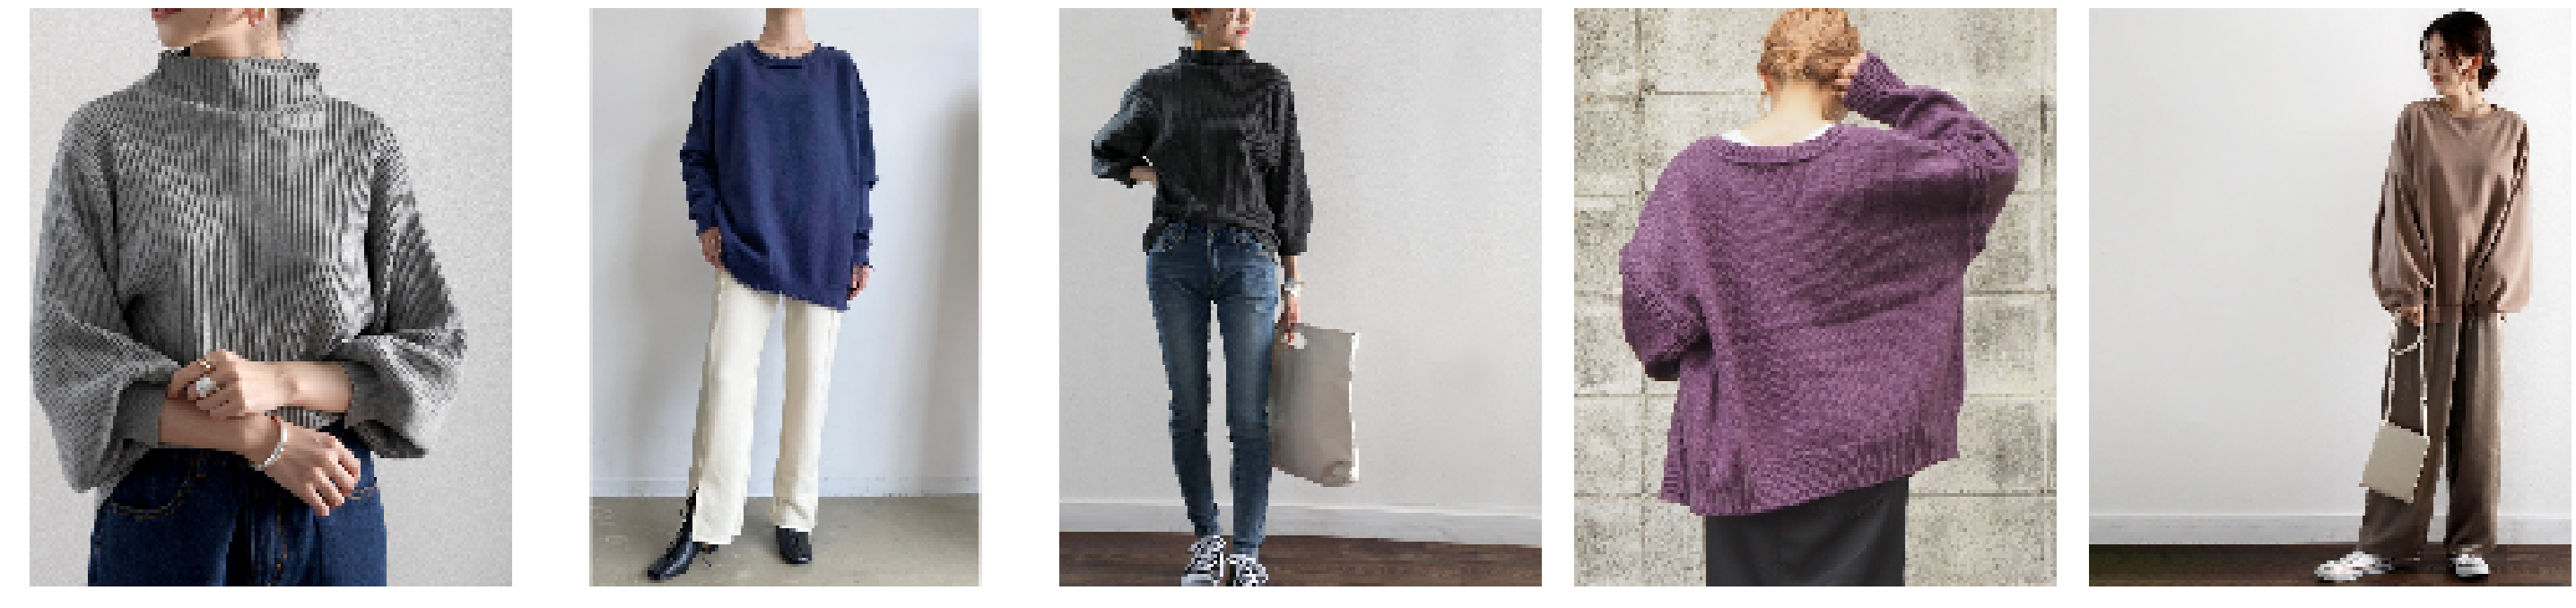

[0.59]
[0.344]
[0.863]
[0.062]
[0.833]
{'w7e': 1, 'w1': 0}


In [41]:
import numpy as np

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(40,40))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_training_images, _  = next(train_data_gen) 
plotImages(sample_training_images[:5])

np.set_printoptions(precision=3, floatmode='maxprec')
predict = model.predict(sample_traininge_images[:5])
for i in range(len(predict)):
    print(predict[i] )
# print(len(predict))

label_dict = train_data_gen.class_indices
print(label_dict)
